# Introduction

In this lab we are going to measure the frequency response using the provided `nanoVNA` network analyzer.

NanoVNA is able to be controlled via USB serial interface from PC. There are sample scripts in this directory.

## Hardware setup

![crystal setup](uspas_llrf-crystal.png)

Toggle the power switch of `nanoVNA` to `ON`.

## Software setup

Pre-requirement:

```bash
$ cd python
$ pip3 install -r requirements.txt
```

Usage of drive `nanovna.py`:

* Plot reflection LOGMAG.

    ```bash
    $ ./nanovna.py -p -P 0 -S 39.7e6 -E 40.3e6
    ```
* Plot transmission LOGMAG.

    ```bash
    $ ./nanovna.py -p -P 1 -S 39.7e6 -E 40.3e6
    ```

## Reference
* [NanoVNA repository](https://github.com/ttrftech/NanoVNA)
* [NanoVNA manual](https://nanovna.com/)

# Exercise

## Crystals:
1. Calibrate the Nano-VNA (2-port configuration), with a center of 20 MHz and span of 1 kHz. 
2. Capture live data both $S_{11}$ and $S_{21}$ from Nano-VNA.
3. Calculate the 3dB bandwidth, Quality factors ($Q_0$ and $Q_L$), and coupling factor.

## Cavities:
1. For a given cavity, find it's resonance frequency and the 3dB bandwidth.
2. Calibrate the Nano-VNA (2-port configuration), with a center of resonance frequency and 10 times the measured bandwidth.
3. Capture live data both $S_{11}$ and $S_{21}$ from Nano-VNA.
4. Calculate the Quality factors ($Q_0$ and $Q_L$), and coupling factor.

# Reference Capture S21 response using `nanoVNA`

Note: the following example uses a 40.0MHz crystal instead the provided 20.00MHz crystal.

Please analysis the data using mathematical concepts taught in the class, and you may compare with results with the `skrf` functions like shown below.

In [1]:
%matplotlib inline
from nanovna import NanoVNA
from matplotlib import pyplot as plt
import skrf as rf
rf.stylely()

In [2]:
# define freq range
start_f, stop_f = 39.9e6, 40.1e6

# create instance and connect to the device
nv = NanoVNA()
nv.set_sweep(start_f, stop_f)
nv.fetch_frequencies()

In [3]:
s11 = nv.data(0)
s21 = nv.data(1)

In [4]:
resonator = nv.skrf_network(s21)

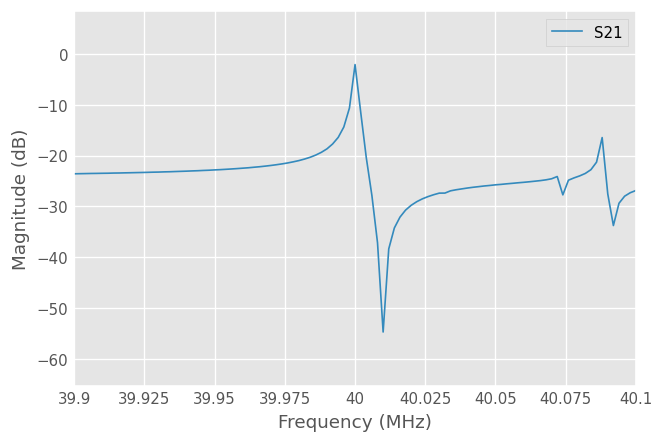

In [5]:
resonator.plot_s_db(label='S21')

In [6]:
Q = rf.Qfactor(resonator, res_type='transmission')
res = Q.fit()

In [8]:
Q

Q-factor of Network None. (fitted: f_L=40.000MHz, Q_L=30424.697)

In [9]:
new_freq = rf.Frequency(start_f / 1e6, stop_f / 1e6, npoints=5001, unit='MHz')
fitted_network = Q.fitted_network(res, frequency=new_freq)

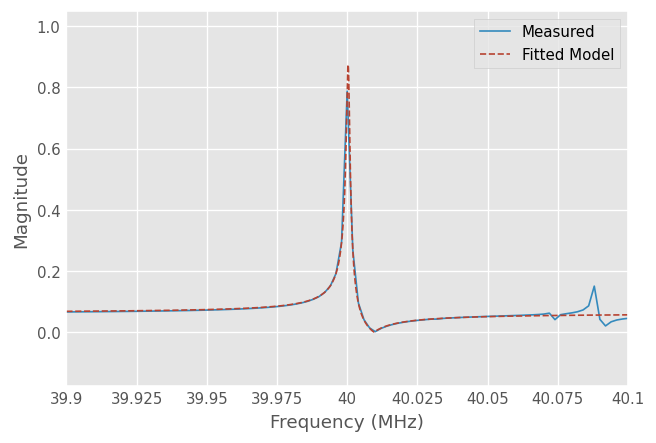

In [10]:
resonator.plot_s_mag(label='Measured', lw=1)
fitted_network.plot_s_mag(label='Fitted Model', lw=1, ls='--')

In [11]:
print(f'Bandwidth: {Q.BW:.3f} Hz')

Bandwidth: 1314.734 Hz


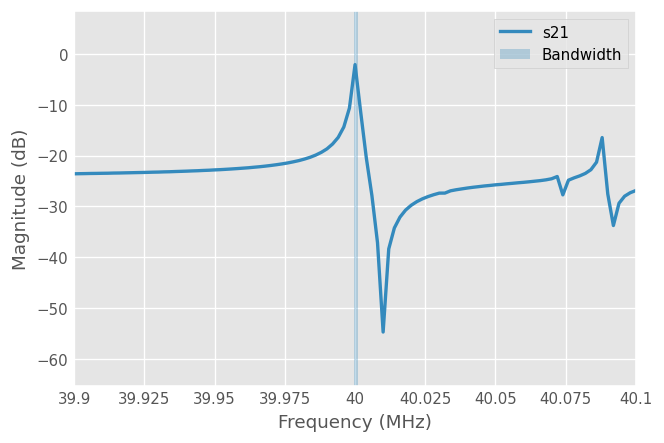

In [13]:
fig, ax = plt.subplots()
resonator.plot_s_db(label='s21', lw=2, ax=ax)
ax.axvspan(xmin=Q.f_L-Q.BW/2, xmax=Q.f_L+Q.BW/2, alpha=0.3, label='Bandwidth')
ax.legend();
# ax.set_xlim(Q.f_L-Q.BW*2, Q.f_L+Q.BW*2)